In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_train=pd.read_csv('train.csv')

y_train= df_train.SalePrice
y_train

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [5]:
df_train=df_train.drop('SalePrice',axis=1)

In [6]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
df_test=pd.read_csv('test.csv')

In [8]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [9]:
submission=pd.read_csv('sample_submission.csv')

In [10]:
submission

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [11]:
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [12]:
df_train.shape

(1460, 80)

In [13]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


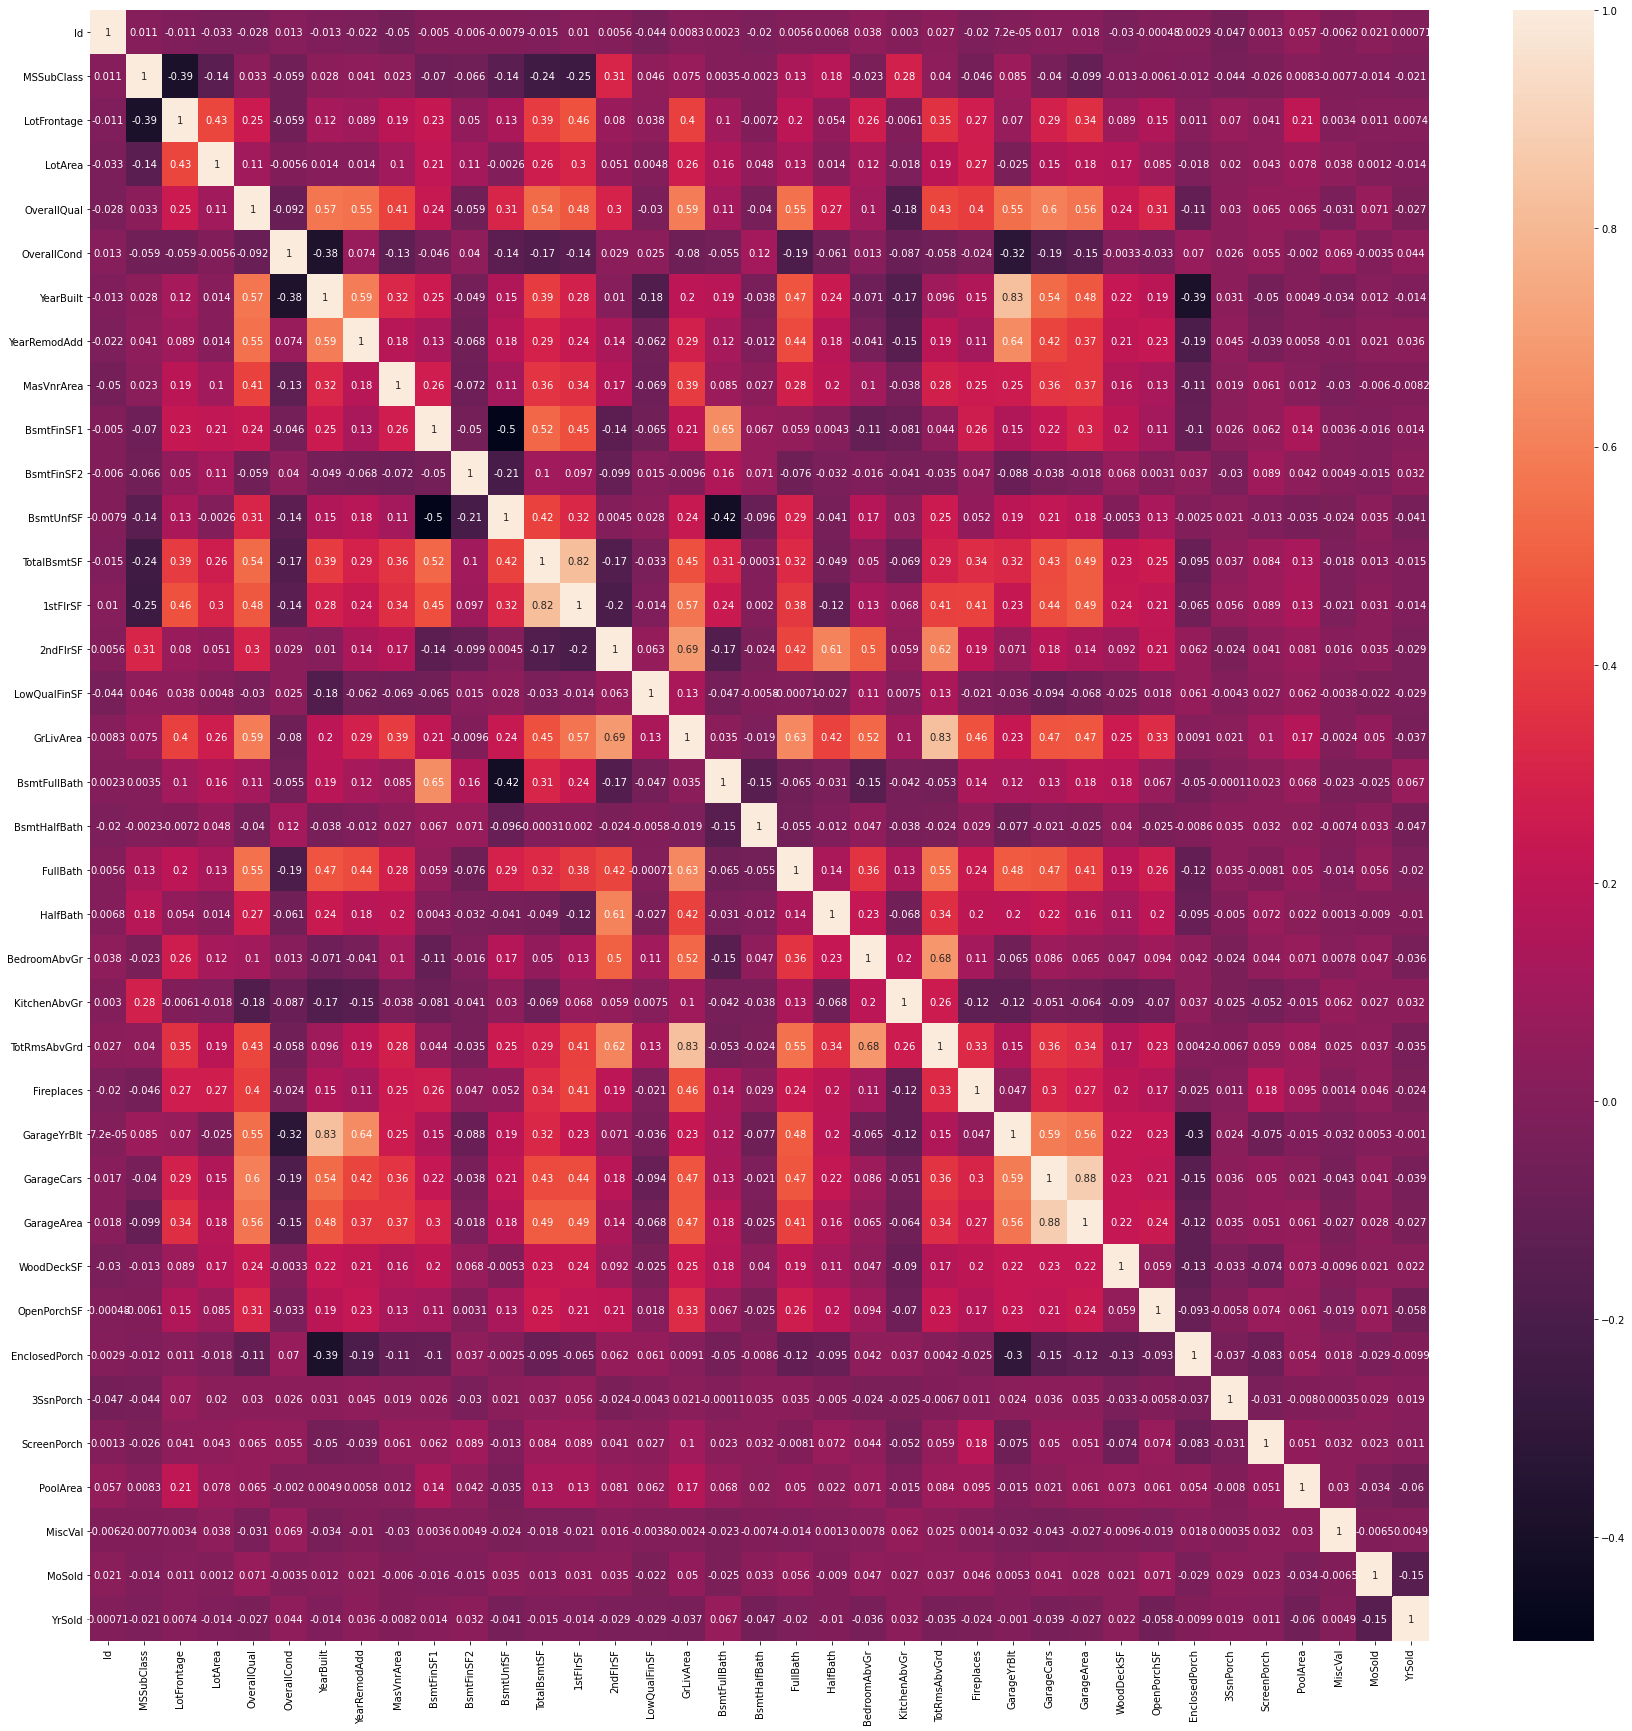

In [14]:
#plt.figure(figsize=(12,8))
plt.subplots(figsize=(30,30))

sns.heatmap(df_train.corr(),annot=True)

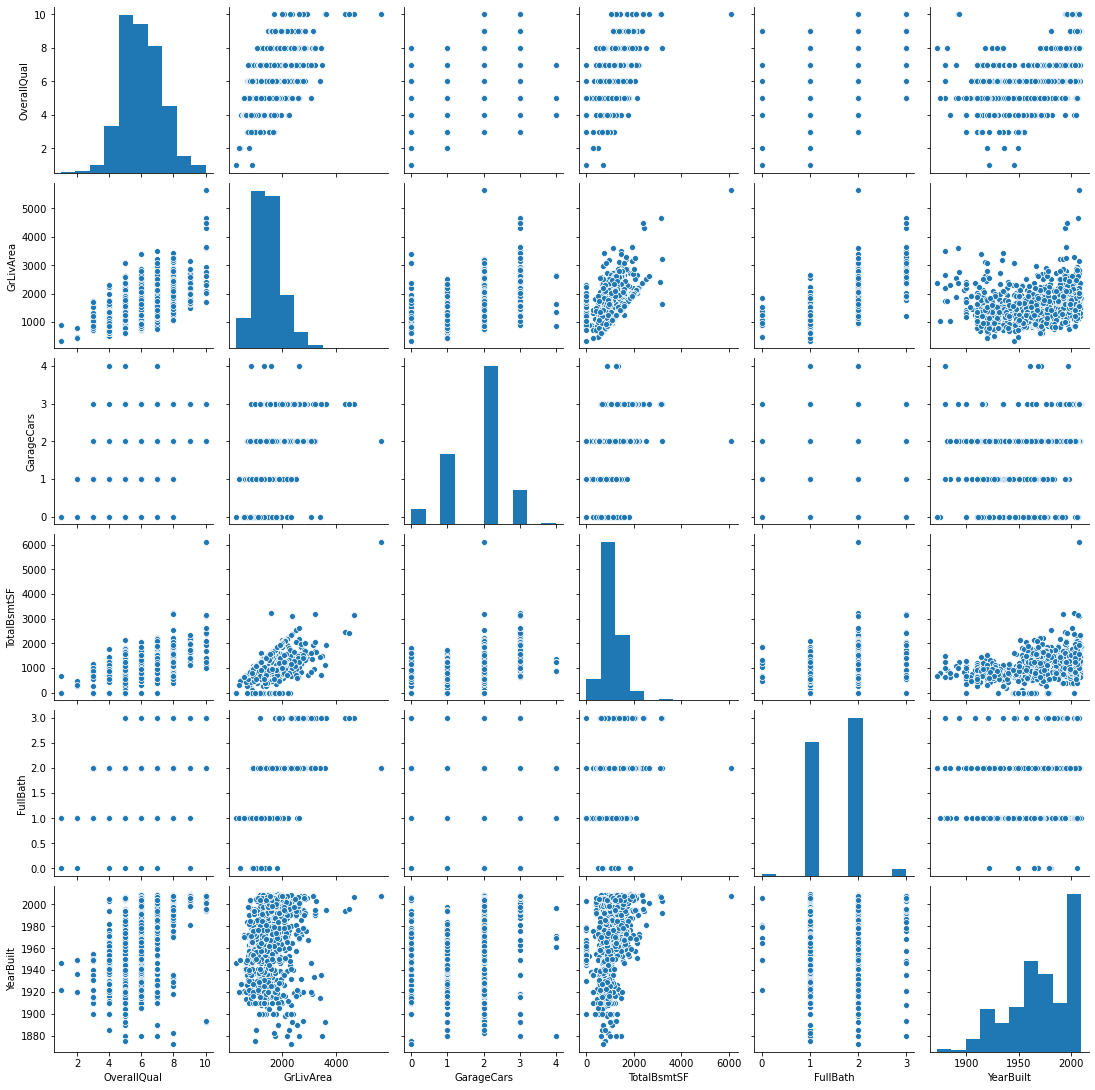

In [15]:
sns.pairplot(df_train[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']])

# Missing Data

In [16]:
all_data=pd.concat((df_train,df_test))
all_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [17]:
all_data.isnull().count()

Id               2919
MSSubClass       2919
MSZoning         2919
LotFrontage      2919
LotArea          2919
                 ... 
MiscVal          2919
MoSold           2919
YrSold           2919
SaleType         2919
SaleCondition    2919
Length: 80, dtype: int64

In [18]:
(all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False).head(20)

PoolQC          0.996574
MiscFeature     0.964029
Alley           0.932169
Fence           0.804385
FireplaceQu     0.486468
LotFrontage     0.166495
GarageCond      0.054471
GarageQual      0.054471
GarageYrBlt     0.054471
GarageFinish    0.054471
GarageType      0.053786
BsmtCond        0.028092
BsmtExposure    0.028092
BsmtQual        0.027749
BsmtFinType2    0.027407
BsmtFinType1    0.027064
MasVnrType      0.008222
MasVnrArea      0.007879
MSZoning        0.001370
BsmtHalfBath    0.000685
dtype: float64

In [19]:
all_data.isnull().sum().sort_values(ascending=False).head(40)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageQual       159
GarageYrBlt      159
GarageFinish     159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF1         1
Exterior1st        1
Exterior2nd        1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
SaleType           1
Electrical         1
KitchenQual        1
GarageArea         1
GarageCars         1
HouseStyle         0
LandSlope          0
MSSubClass         0
LotArea            0
Street             0
LotShape           0
dtype: int64

In [20]:
all_data.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage','GarageCond','GarageType','GarageYrBlt','GarageFinish','GarageQual','BsmtExposure','BsmtFinType2','BsmtCond','BsmtQual','BsmtFinType1','MasVnrArea','MasVnrType'],axis=1,inplace=True)

In [21]:
all_data

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,32,0,0,0,0,700,7,2006,WD,Normal


In [22]:
#index_drop=df_train[df_train['Electrical'].isnull()==True].index

In [23]:
#all_data.drop(index_drop,inplace=True)


from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=df_train
variables.shape[1]
variables=df_train
vif=pd.DataFrame()
vif['Feature']=variables.columns
vif['VIF']=sorted([variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])],reverse=True)
          
vif.head(80)

In [24]:
for col in ('KitchenQual','Exterior2nd','SaleType','Exterior1st','Functional','Utilities','MSZoning','Electrical'):
    all_data[col] = all_data[col].fillna('None')

In [25]:
for col in ('GarageArea', 'GarageCars','BsmtFullBath','BsmtHalfBath','BsmtFinSF1','BsmtUnfSF', 'TotalBsmtSF','BsmtFinSF2'  ):
    all_data[col] = all_data[col].fillna(0)

In [26]:
all_data.isnull().sum().head(30)

Id              0
MSSubClass      0
MSZoning        0
LotArea         0
Street          0
LotShape        0
LandContour     0
Utilities       0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
ExterQual       0
ExterCond       0
Foundation      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
dtype: int64

# Convert Str to Float or Int

In [27]:
#all_data.drop(['SalePrice'], axis=1, inplace=True)

In [28]:
all_data=pd.get_dummies(all_data,drop_first=True)

In [29]:
df_train=all_data[:df_train.shape[0]]

df_test=all_data[df_train.shape[0]:]

In [30]:
df_train

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706.0,0.0,150.0,...,0,0,0,0,1,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978.0,0.0,284.0,...,0,0,0,0,1,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486.0,0.0,434.0,...,0,0,0,0,1,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216.0,0.0,540.0,...,0,0,0,0,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655.0,0.0,490.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0.0,0.0,953.0,...,0,0,0,0,1,0,0,0,1,0
1456,1457,20,13175,6,6,1978,1988,790.0,163.0,589.0,...,0,0,0,0,1,0,0,0,1,0
1457,1458,70,9042,7,9,1941,2006,275.0,0.0,877.0,...,0,0,0,0,1,0,0,0,1,0
1458,1459,20,9717,5,6,1950,1996,49.0,1029.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [31]:
df_test

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,11622,5,6,1961,1961,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
1,1462,20,14267,6,6,1958,1958,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
2,1463,60,13830,5,5,1997,1998,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0
3,1464,60,9978,6,6,1998,1998,602.0,0.0,324.0,...,0,0,0,0,1,0,0,0,1,0
4,1465,120,5005,8,5,1992,1992,263.0,0.0,1017.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1936,4,7,1970,1970,0.0,0.0,546.0,...,0,0,0,0,1,0,0,0,1,0
1455,2916,160,1894,4,5,1970,1970,252.0,0.0,294.0,...,0,0,0,0,1,0,0,0,0,0
1456,2917,20,20000,5,7,1960,1996,1224.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1457,2918,85,10441,5,5,1992,1992,337.0,0.0,575.0,...,0,0,0,0,1,0,0,0,1,0


In [32]:
y_train

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [33]:
df_test

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,11622,5,6,1961,1961,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
1,1462,20,14267,6,6,1958,1958,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
2,1463,60,13830,5,5,1997,1998,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0
3,1464,60,9978,6,6,1998,1998,602.0,0.0,324.0,...,0,0,0,0,1,0,0,0,1,0
4,1465,120,5005,8,5,1992,1992,263.0,0.0,1017.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1936,4,7,1970,1970,0.0,0.0,546.0,...,0,0,0,0,1,0,0,0,1,0
1455,2916,160,1894,4,5,1970,1970,252.0,0.0,294.0,...,0,0,0,0,1,0,0,0,0,0
1456,2917,20,20000,5,7,1960,1996,1224.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1457,2918,85,10441,5,5,1992,1992,337.0,0.0,575.0,...,0,0,0,0,1,0,0,0,1,0


# Outliars

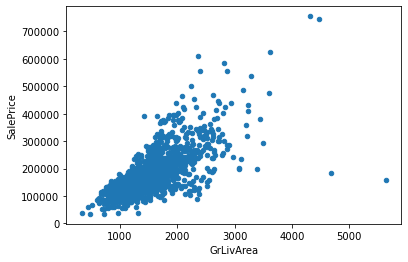

In [34]:
data_outliers=pd.concat([df_train['GrLivArea'],y_train],axis=1)
data_outliers.plot.scatter(x='GrLivArea',y='SalePrice')


In [35]:
df_train['GrLivArea'].sort_values(ascending=False)

1298    5642
523     4676
1182    4476
691     4316
1169    3627
        ... 
528      605
29       520
916      480
1100     438
533      334
Name: GrLivArea, Length: 1460, dtype: int64

In [36]:
dropindex=df_train[df_train['GrLivArea']>4500].index

df_train.drop(dropindex,inplace=True)
    

C:\Users\kurtd\anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [37]:
df_train['GrLivArea'].sort_values(ascending=False)

1182    4476
691     4316
1169    3627
185     3608
304     3493
        ... 
528      605
29       520
916      480
1100     438
533      334
Name: GrLivArea, Length: 1458, dtype: int64

In [38]:
y_train.drop(dropindex,inplace=True)
y_train.shape

(1458,)

# log

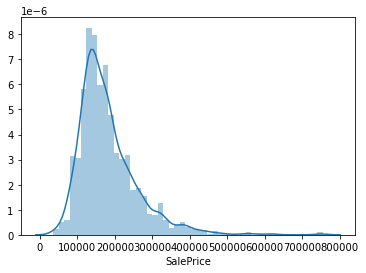

In [39]:
sns.distplot(y_train)

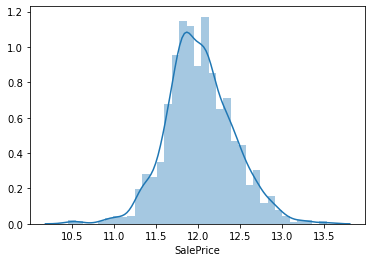

In [40]:
sns.distplot(np.log(y_train))

In [41]:
import scipy
from scipy import stats


In [42]:
y_train=np.log(y_train)


In [43]:
type(y_train)

pandas.core.series.Series

# Scale

In [44]:
from sklearn.preprocessing import StandardScaler, RobustScaler


In [45]:
scaler=StandardScaler()

In [46]:
X_train_scaled=scaler.fit_transform(df_train)

In [47]:
X_train_scaled

array([[-1.73031138,  0.07342554, -0.20393408, ..., -0.11793306,
         0.46586305, -0.3035372 ],
       [-1.72793866, -0.87186754, -0.08725172, ..., -0.11793306,
         0.46586305, -0.3035372 ],
       [-1.72556594,  0.07342554,  0.08016212, ..., -0.11793306,
         0.46586305, -0.3035372 ],
       ...,
       [ 1.72674416,  0.30974881, -0.14386803, ..., -0.11793306,
         0.46586305, -0.3035372 ],
       [ 1.72911688, -0.87186754, -0.07538055, ..., -0.11793306,
         0.46586305, -0.3035372 ],
       [ 1.7314896 , -0.87186754, -0.05305871, ..., -0.11793306,
         0.46586305, -0.3035372 ]])

# Model

In [48]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

# Gradient Boosting Regression 

In [49]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train_scaled)
    rmse= np.sqrt(-cross_val_score(model, X_train_scaled, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)


In [50]:
model_GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)


In [51]:
X_train_scaled.shape

(1458, 201)

In [52]:
y_train.shape

(1458,)

In [53]:
score = rmsle_cv(model_GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1169 (0.0070)



In [54]:
model_GBoost.fit(X_train_scaled,y_train)

GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=4,
                          max_features='sqrt', min_samples_leaf=15,
                          min_samples_split=10, n_estimators=3000,
                          random_state=5)

In [55]:
model_GBoost.score(X_train_scaled,y_train)

0.9849894602149307

# Lasso

In [56]:
#use make pipeline to do the robustscaler and lasso together
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
lasso.fit(X_train_scaled,y_train)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('lasso', Lasso(alpha=0.0005, random_state=1))])

In [57]:
model_lasso=Lasso()


In [58]:
model_lasso.fit(X_train_scaled,y_train)

Lasso()

In [59]:
score1=rmsle_cv(lasso)

In [60]:
score = rmsle_cv(model_lasso)

In [61]:
print("Rainforest score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Rainforest score: 0.3995 (0.0158)



In [62]:
print("Rainforest score: {:.4f} ({:.4f})\n".format(score1.mean(), score1.std()))

Rainforest score: 0.1169 (0.0073)



# Rainforest 

In [63]:

model_forest=RandomForestRegressor()

In [64]:
model_forest.fit(X_train_scaled,y_train)

RandomForestRegressor()

In [65]:
#get the root mean square error between X_train and y_train

score = rmsle_cv(model_forest)
print("Rainforest score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Rainforest score: 0.1400 (0.0047)



In [66]:
score

array([0.14231954, 0.14183853, 0.14577269, 0.13184794, 0.13844119])

In [67]:
model_forest.score(X_train_scaled,y_train)

0.9832246620355963

In [68]:
# get rmse(root mean square error) between prediction and y_train
pred=model_forest.predict(X_train_scaled)

In [69]:
from sklearn import metrics

In [70]:
np.sqrt(metrics.mean_squared_error(y_train,pred))

0.05175324195048629

# XGBoost :

In [71]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [72]:
score = rmsle_cv(model_xgb)
print("XG Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[17:01:20] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:01:21] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:01:22] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings bu

In [73]:
model_xgb.fit(X_train_scaled,y_train)
pred=model_xgb.predict(X_train_scaled)

[17:01:26] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [74]:
np.sqrt(metrics.mean_squared_error(y_train,pred))

0.08089485489147707

# LightGMB

In [75]:
model_lgb = lgb.LGBMRegressor()

In [76]:
score = rmsle_cv(model_lgb)
print("LightGMB score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

LightGMB score: 0.1272 (0.0047)



In [77]:
model_lgb.fit(X_train_scaled,y_train)
pred=model_lgb.predict(X_train_scaled)
np.sqrt(metrics.mean_squared_error(y_train,pred))

0.04393110153631209

# Prediction

In [78]:
#another way to get rmse

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [79]:
y_pred=model_xgb.predict(X_train_scaled)
rmsle(y_train,y_pred)


0.08089485489147707

In [80]:
y_pred=model_GBoost.predict(X_train_scaled)
rmsle(y_train,y_pred)

0.04895534054827986

In [81]:
df_test_scaled=scaler.transform(df_test)
df_test_scaled

array([[ 1.73386233e+00, -8.71867543e-01,  1.17906325e-01, ...,
        -1.17933057e-01,  4.65863049e-01, -3.03537199e-01],
       [ 1.73623505e+00, -8.71867543e-01,  3.86275769e-01, ...,
        -1.17933057e-01,  4.65863049e-01, -3.03537199e-01],
       [ 1.73860777e+00,  7.34255432e-02,  3.41936469e-01, ...,
        -1.17933057e-01,  4.65863049e-01, -3.03537199e-01],
       ...,
       [ 5.18854515e+00, -8.71867543e-01,  9.67962735e-01, ...,
        -1.17933057e-01, -2.14655359e+00, -3.03537199e-01],
       [ 5.19091787e+00,  6.64233722e-01, -1.92139331e-03, ...,
        -1.17933057e-01,  4.65863049e-01, -3.03537199e-01],
       [ 5.19329059e+00,  7.34255432e-02, -8.45122166e-02, ...,
        -1.17933057e-01,  4.65863049e-01, -3.03537199e-01]])

In [82]:
X_train_scaled

array([[-1.73031138,  0.07342554, -0.20393408, ..., -0.11793306,
         0.46586305, -0.3035372 ],
       [-1.72793866, -0.87186754, -0.08725172, ..., -0.11793306,
         0.46586305, -0.3035372 ],
       [-1.72556594,  0.07342554,  0.08016212, ..., -0.11793306,
         0.46586305, -0.3035372 ],
       ...,
       [ 1.72674416,  0.30974881, -0.14386803, ..., -0.11793306,
         0.46586305, -0.3035372 ],
       [ 1.72911688, -0.87186754, -0.07538055, ..., -0.11793306,
         0.46586305, -0.3035372 ],
       [ 1.7314896 , -0.87186754, -0.05305871, ..., -0.11793306,
         0.46586305, -0.3035372 ]])

In [83]:
predict=model_xgb.predict(df_test_scaled)


# Submission

In [84]:
sub = pd.DataFrame()
sub['Id'] = df_test['Id']
sub['SalePrice'] = np.exp(predict)
sub.to_csv('submission.csv',index=False)

In [85]:
sub

,Id,SalePrice
0,1461,124227.500000
1,1462,165123.218750
2,1463,182519.375000
3,1464,190563.828125
4,1465,187948.593750
...,...,...
1454,2915,80409.492188
1455,2916,84381.335938
1456,2917,170454.812500
1457,2918,121486.523438


In [86]:
df_test

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,11622,5,6,1961,1961,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
1,1462,20,14267,6,6,1958,1958,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
2,1463,60,13830,5,5,1997,1998,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0
3,1464,60,9978,6,6,1998,1998,602.0,0.0,324.0,...,0,0,0,0,1,0,0,0,1,0
4,1465,120,5005,8,5,1992,1992,263.0,0.0,1017.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1936,4,7,1970,1970,0.0,0.0,546.0,...,0,0,0,0,1,0,0,0,1,0
1455,2916,160,1894,4,5,1970,1970,252.0,0.0,294.0,...,0,0,0,0,1,0,0,0,0,0
1456,2917,20,20000,5,7,1960,1996,1224.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1457,2918,85,10441,5,5,1992,1992,337.0,0.0,575.0,...,0,0,0,0,1,0,0,0,1,0
